In [55]:
from numpy import *
import operator
from os import listdir
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector
datingDataMat,datingLabels=file2matrix('datingTestSet2.txt')

In [40]:
a=loadtxt('datingTestSet2.txt',delimiter="\t")
b=a[:,:3]
b

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

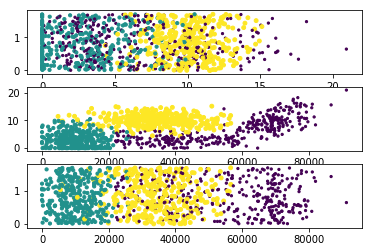

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
fig=plt.figure()
ax=fig.add_subplot(311)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],5*array(datingLabels),5*array(datingLabels))
ax1=fig.add_subplot(312)
ax1.scatter(datingDataMat[:,0],datingDataMat[:,1],5*array(datingLabels),5*array(datingLabels))
ax2=fig.add_subplot(313)
ax2.scatter(datingDataMat[:,0],datingDataMat[:,2],5*array(datingLabels),5*array(datingLabels))
plt.show()

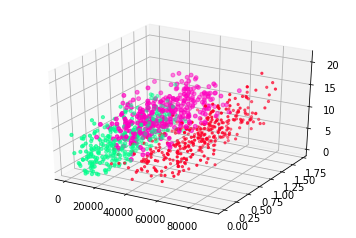

In [58]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
fig=plt.figure()
ax3=fig.add_subplot(111,projection='3d')
ax3.scatter(datingDataMat[:,0],datingDataMat[:,2],datingDataMat[:,1],s=5*array(datingLabels),c=5*array(datingLabels),cmap='gist_rainbow')
plt.show()

## 归一化处理
     数据归一化（标准化）处理是数据挖掘的一项基础工作，不同评价指标往往具有不同的量纲和量纲单位，这样的情况会影响到数据分析的结果，为了消除指标之间的量纲影响，需要进行数据标准化处理，以解决数据指标之间的可比性。原始数据经过数据标准化处理后，各指标处于同一数量级，适合进行综合对比评价。
### 1）min-max标准化
min-max标准化也叫做离差标准化，是对原始数据的线性变换，使结果落到[0,1]区间，其对应的数学公式如下：
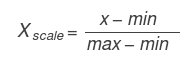
也可以使结果落到[-1,1]区间，对应数学公式如下：
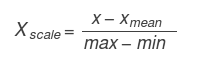
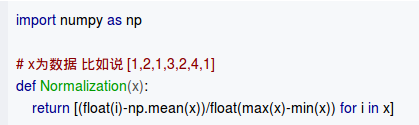
#### 缺点如下：
     (1)当有新数据加入时，可能导致max和min的变化，需要重新定义。
     (2)如果数据中有一些偏离正常数据的异常点，就会导致标准化结果的不准确性。比如说一个公司员工（A，B，C，D）的薪水为6k,8k,7k,10w,这种情况下进行归一化对每个员工来讲都是不合理的。
### 2）z-score标准化
z-score标准化也叫标准差标准化，代表的是分值偏离均值的程度，经过处理的数据符合标准正态分布，即均值为0，标准差为1。其转化函数为
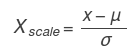其中μ为所有样本数据的均值，σ为所有样本数据的标准差。
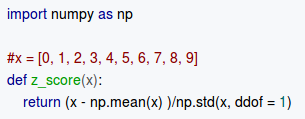
### 3）改进的z-score标准化
将标准分公式中的均值改为中位数，将标准差改为绝对偏差。
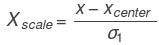中位数是指将所有数据进行排序，取中间的那个值，如数据量是偶数，则取中间两个数据的平均值。σ1为所有样本数据的绝对偏差,其计算公式为： 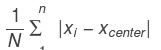
## sklearn包中的归一化处理：
###   1) X_scaled = preprocessing.scale(X_train)  ---->z-score处理方法
###   2) min_max_scaler = preprocessing.MinMaxScaler()
###       X_train_minmax = min_max_scaler.fit_transform(X_train)

In [90]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

X= preprocessing.scale(datingDataMat)
X_train, X_test, Y_train, Y_test = train_test_split(X, datingLabels, test_size=0.30, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(X))
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
iris_y_predict = knn.predict(X_test) 
score=knn.score(X_test,Y_test,sample_weight=None)
score

700
300
1000


0.9266666666666666

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import preprocessing
import numpy as np
X= preprocessing.scale(datingDataMat)
knn=KNeighborsClassifier()
knn.fit(X,datingLabels)
iris_y_predict = knn.predict(X) 
score=knn.score(X,datingLabels,sample_weight=None)

In [78]:
from sklearn import datasets  
#导入内置数据集模块                      
from sklearn.neighbors import KNeighborsClassifier 
#导入sklearn.neighbors模块中KNN类
import numpy as np 
np.random.seed(0)  
#设置随机种子，不设置的话默认是按系统时间作为参数，因此每次调用随机模块时产生的随机数都不一样设置后每次产生的一样
iris=datasets.load_iris() 
#导入鸢尾花的数据集，iris是一个类似于结构体的东西，内部有样本数据，如果是监督学习还有标签数据
iris_x=iris.data   
 #样本数据150*4二维数据，代表150个样本，每个样本4个属性分别为花瓣和花萼的长、宽
iris_y=iris.target  
#长150的以为数组，样本数据的标签
indices = np.random.permutation(len(iris_x)) 
#permutation接收一个数作为参数(150),产生一个0-149一维数组，只不过是随机打乱的，当然她也可以接收一个一维数组作为参数，结果是直接对这个数组打乱
iris_x_train = iris_x[indices[:-10]]
 #随机选取140个样本作为训练数据集
iris_y_train = iris_y[indices[:-10]] 
#并且选取这140个样本的标签作为训练数据集的标签
iris_x_test  = iris_x[indices[-10:]]
 #剩下的10个样本作为测试数据集
iris_y_test  = iris_y[indices[-10:]] 
#并且把剩下10个样本对应标签作为测试数据及的标签

print(iris_x_test[-2:-1])
print(iris_x_test[-1:])
knn = KNeighborsClassifier() 
#定义一个knn分类器对象
knn.fit(iris_x_train, iris_y_train)  
#调用该对象的训练方法，主要接收两个参数：训练数据集及其样本标签

iris_y_predict = knn.predict(iris_x_test) 
 #调用该对象的测试方法，主要接收一个参数：测试数据集
probility=knn.predict_proba(iris_x_test)  
 #计算各测试样本基于概率的预测
neighborpoint=knn.kneighbors(iris_x_test[-1:],5,False)
#计算与最后一个测试样本距离在最近的5个点，返回的是这些样本的序号组成的数组
score=knn.score(iris_x_test,iris_y_test,sample_weight=None)
#调用该对象的打分方法，计算出准确率

print('iris_y_predict = ')  
print(iris_y_predict)  
#输出测试的结果

print('iris_y_test = ')
print(iris_y_test)    
#输出原始测试数据集的正确标签，以方便对比
print('Accuracy:',score ) 
#输出准确率计算结果
print( 'neighborpoint of last test sample:',neighborpoint)
 
print ('probility:',probility)

[[7.7 3.8 6.7 2.2]]
[[4.6 3.2 1.4 0.2]]
iris_y_predict = 
[1 2 1 0 0 0 2 1 2 0]
iris_y_test = 
[1 1 1 0 0 0 2 1 2 0]
Accuracy: 0.9
neighborpoint of last test sample: [[ 75  41  96  78 123]]
probility: [[0.  1.  0. ]
 [0.  0.4 0.6]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]]


In [82]:
import numpy as np
from sklearn.model_selection import train_test_split

X, Y = np.arange(10).reshape((5, 2)), range(5)
print("X=", X)
print("Y=", Y)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)
print("X_train=", X_train)
print("X_test=", X_test)
print("Y_train=", Y_train)
print("Y_test=", Y_test)

X= [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
Y= range(0, 5)
X_train= [[4 5]
 [0 1]
 [6 7]]
X_test= [[2 3]
 [8 9]]
Y_train= [2, 0, 3]
Y_test= [1, 4]
